<a href="https://colab.research.google.com/github/harikab5/SPEECH-EMOTION-RECOGNITION/blob/main/SPEECH_EMOTION_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 426M/428M [00:06<00:00, 42.0MB/s]
100% 428M/428M [00:06<00:00, 67.6MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print("Dataset is loaded")


Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_pearl_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_learn_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_sell_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_dodge_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_chief_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df['label'].value_counts()

,count
label,
sad,400
angry,400
fear,400
disgust,400
ps,400
happy,400
neutral,400


In [ ]:
df['label_count']=df['label'].value_counts()

In [ ]:
df.drop('label_count',axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,fear
2796,/content/tess toronto emotional speech set dat...,fear
2797,/content/tess toronto emotional speech set dat...,fear
2798,/content/tess toronto emotional speech set dat...,fear


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

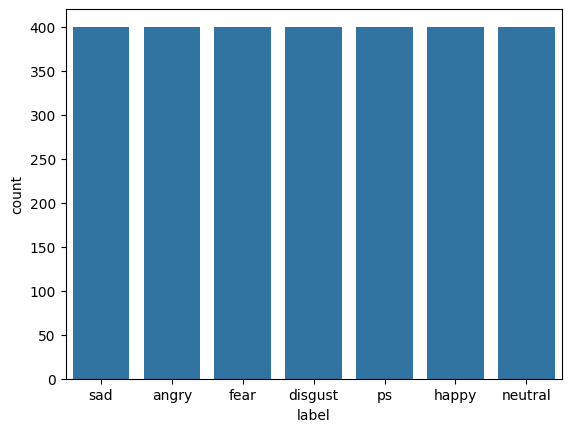

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...   sad
1  /content/tess toronto emotional speech set dat...   sad
2  /content/tess toronto emotional speech set dat...   sad
3  /content/tess toronto emotional speech set dat...   sad
4  /content/tess toronto emotional speech set dat...   sad
['sad' 'angry' 'fear' 'disgust' 'ps' 'happy' 'neutral']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_pearl_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_learn_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_sell_sad.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_germ_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_gap_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_love_fear.wav'],
      dtype=object)

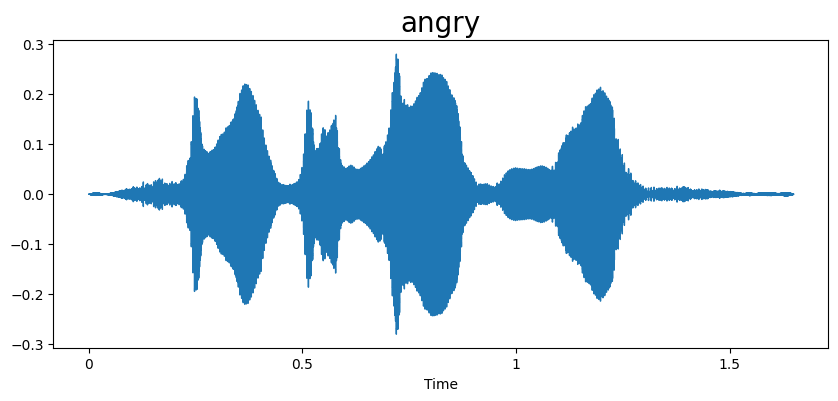

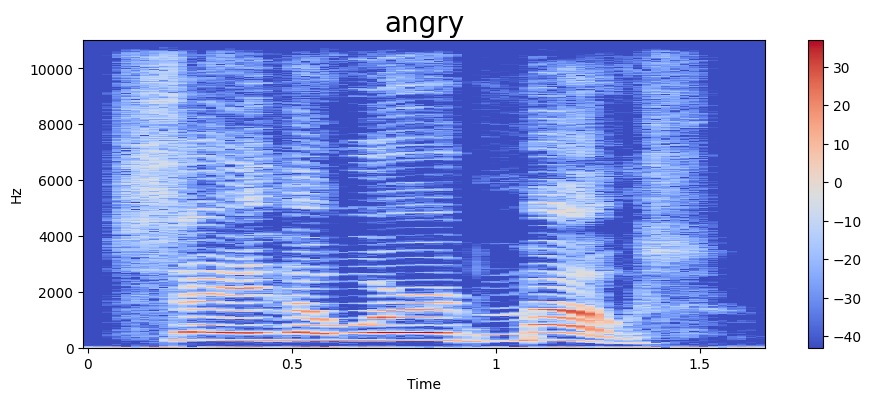

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

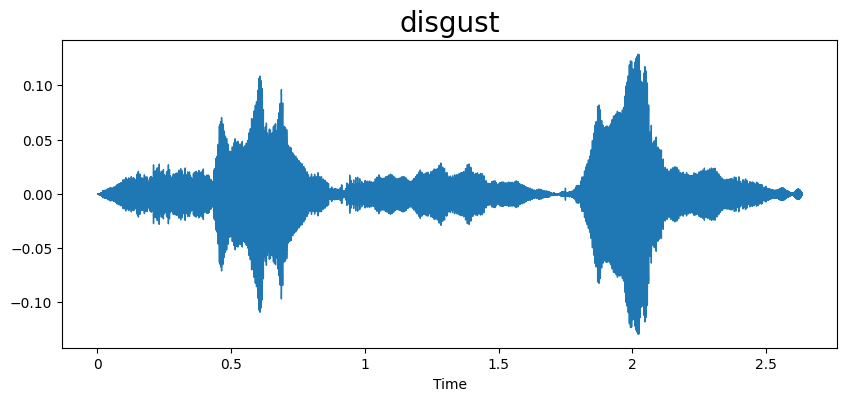

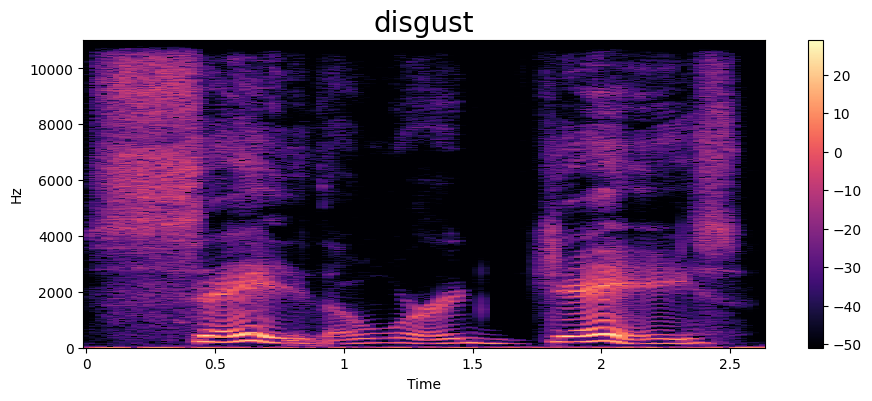

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

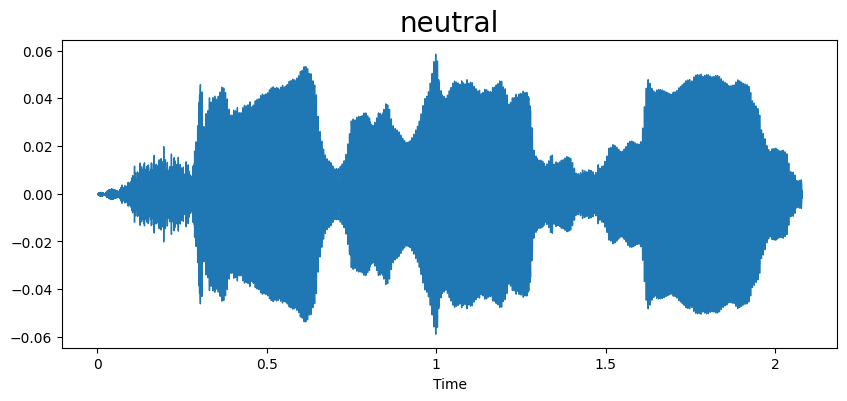

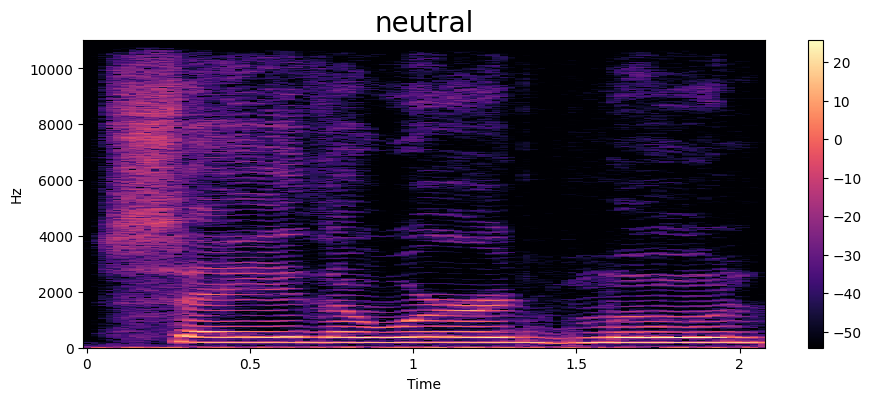

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

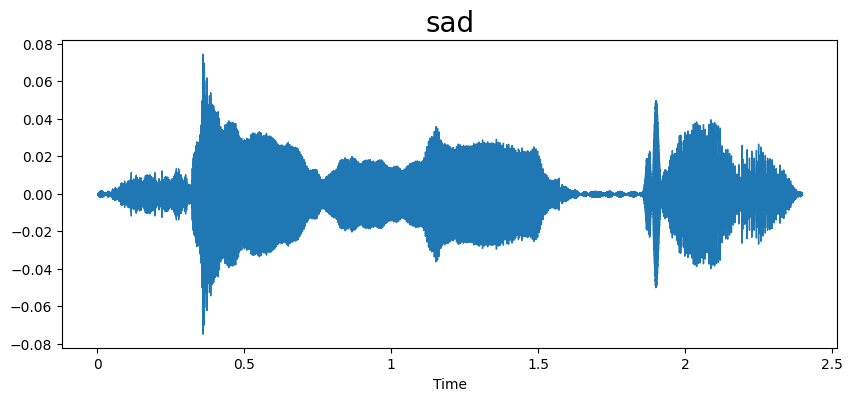

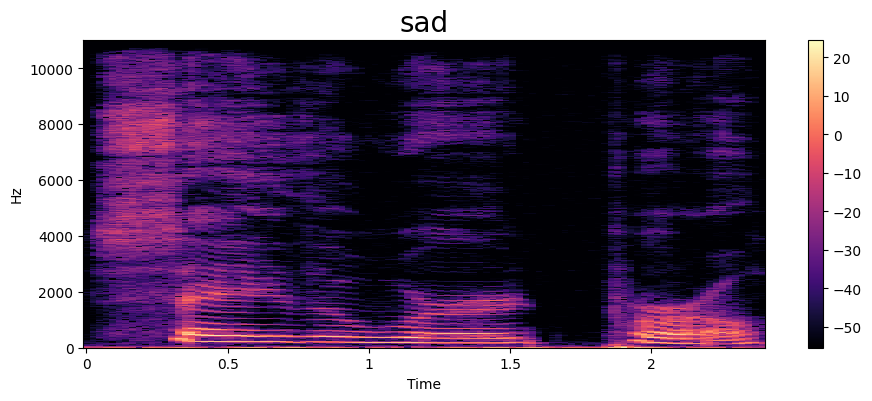

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

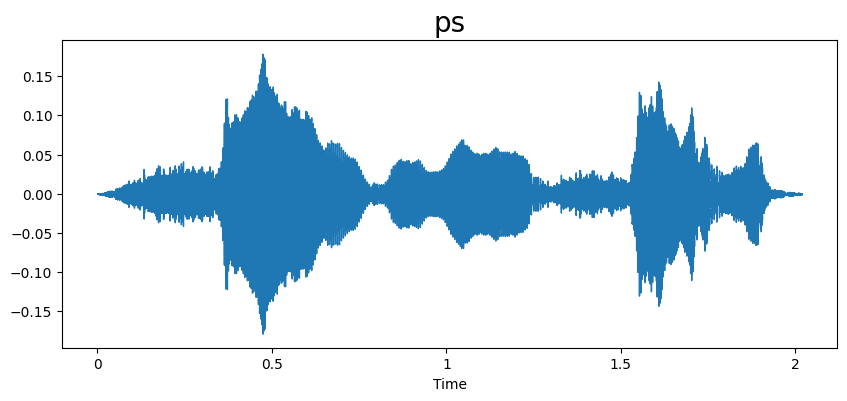

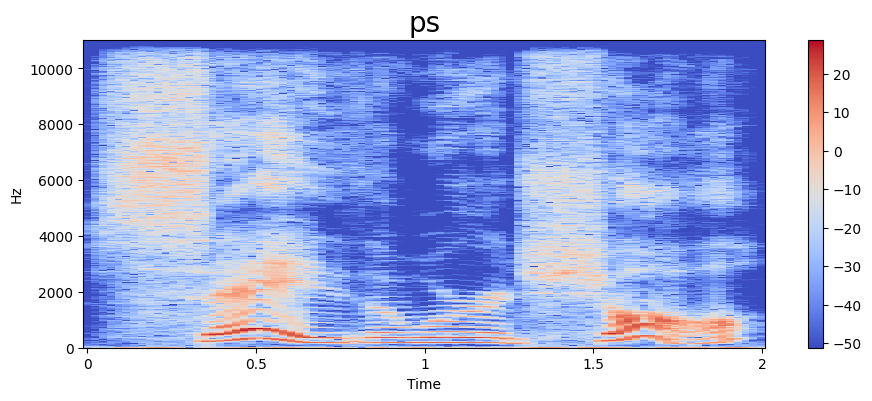

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

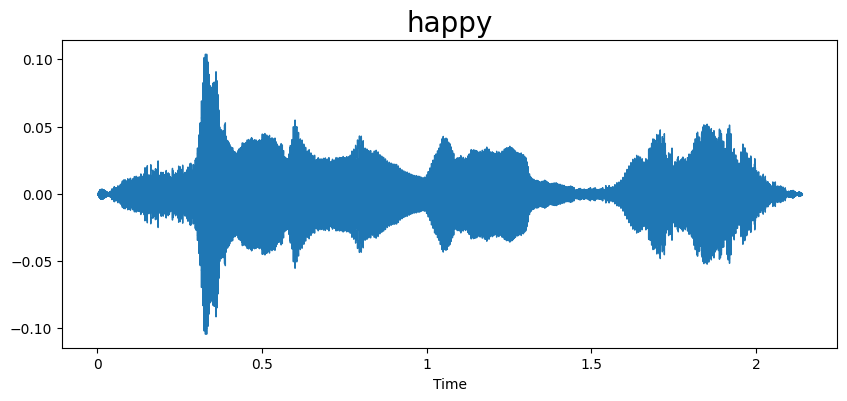

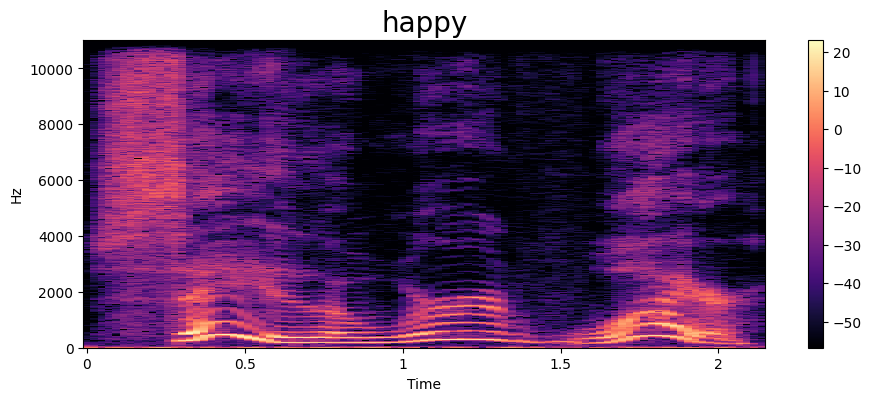

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.60780945e+02,  1.21283714e+02,  4.03024940e+01, -1.95688272e+00,
        1.27031012e+01,  1.29496746e+01, -1.15222511e+01, -1.29523954e+01,
       -1.24701185e+01,  2.61480403e+00, -9.80459118e+00,  3.24308825e+00,
       -6.22430563e+00,  3.68094325e+00,  2.84461427e+00,  3.99887943e+00,
        5.25608921e+00, -1.79159248e+00, -4.68635291e-01, -3.39058256e+00,
       -7.32400775e-01, -2.19358301e+00, -4.63362408e+00, -1.16465592e+00,
       -4.52846336e+00, -1.33463132e+00,  7.82323927e-02,  4.61180627e-01,
       -4.63796139e+00,  3.87507820e+00, -3.00513983e+00,  6.72073221e+00,
        5.18263054e+00,  1.07703075e+01,  1.17580547e+01,  8.34357166e+00,
        9.79885101e+00,  1.38877611e+01,  6.80850220e+00,  1.67479572e+01],
      dtype=float32)

In [ ]:
x_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-560.78094, 121.283714, 40.302494, -1.9568827..."
1,"[-543.1264, 122.242165, 37.79513, 6.1617455, 1..."
2,"[-530.9563, 88.55159, 30.134592, 7.449314, 6.1..."
3,"[-533.4234, 103.415115, 25.950264, 9.481172, 1..."
4,"[-541.4565, 62.0042, 23.376999, 25.315228, 27...."
...,...
2795,"[-472.1058, 67.09805, 9.071742, 0.9781977, 3.3..."
2796,"[-445.36737, 91.2761, -0.58949184, -17.314266,..."
2797,"[-455.13928, 73.262985, 19.117235, -17.232746,..."
2798,"[-455.0134, 84.29203, -0.095545106, -22.462715..."


In [ ]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(2800, 40)

In [ ]:
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
Model : "sequential"

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.2944 - loss: 1.8269 - val_accuracy: 0.6054 - val_loss: 1.0806
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.5143 - loss: 1.2020 - val_accuracy: 0.7196 - val_loss: 0.7293
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.6474 - loss: 0.8462 - val_accuracy: 0.8643 - val_loss: 0.3947
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8013 - loss: 0.5675 - val_accuracy: 0.9000 - val_loss: 0.3162
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.8784 - loss: 0.3985 - val_accuracy: 0.9482 - val_loss: 0.2196
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.8910 - loss: 0.3726 - val_accuracy: 0.9250 - val_loss: 0.2621
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.9327 - loss: 0.2415 - val_accuracy: 0.9500 - val_loss: 0.1771
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.9247 - loss: 0.2581 - val_accuracy: 0

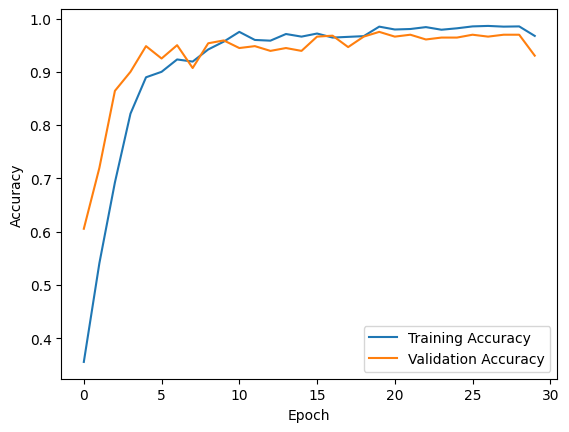

In [ ]:
epoch=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epoch,acc,label='Training Accuracy')
plt.plot(epoch,val_acc,label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


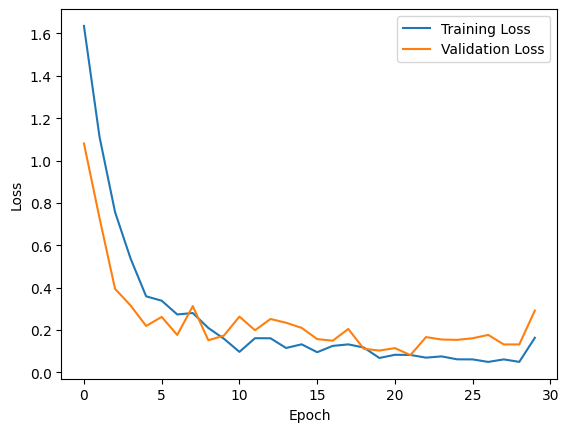

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch,loss,label='Training Loss')
plt.plot(epoch,val_loss,label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  1  4  0 84  0]
 [ 0  0  0  0  0 73  0]
 [ 0  0  4 13  0 33 20]
 [ 0  0  1 11  0 73  1]
 [ 0  0  0  0  0 80  0]
 [ 0  0  0  1  0 85  0]
 [ 0  0  0  0  0 76  0]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        89
     disgust       0.00      0.00      0.00        73
        fear       0.67      0.06      0.11        70
       happy       0.38      0.13      0.19        86
     neutral       0.00      0.00      0.00        80
          ps       0.17      0.99      0.29        86
         sad       0.00      0.00      0.00        76

    accuracy                           0.18       560
   macro avg       0.17      0.17      0.08       560
weighted avg       0.17      0.18      0.09       560



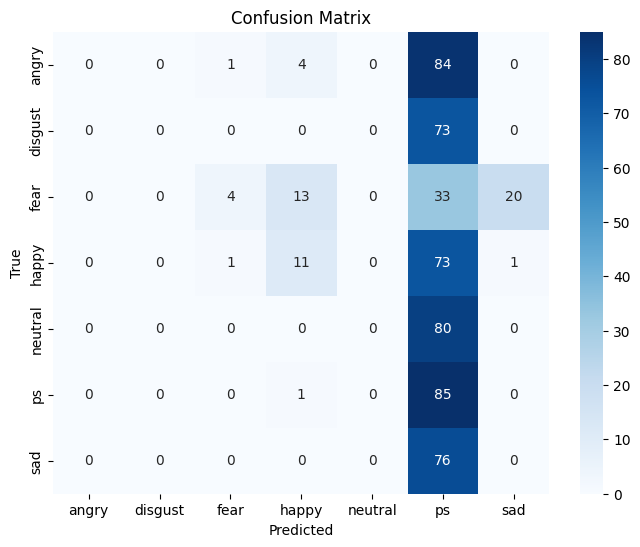

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()